In [1]:
import pandas as pd
import numpy as np

In [2]:
! ls 

MMI_analysis-Copy1.ipynb
MMI_analysis.ipynb
README.md
alpha.ipynb
beta.ipynb
differential_abundance.ipynb
differential_prevalence.ipynb
gbs_cohort_metadata_2024-06-20.txt
gbs_cohort_taxonomy_raw_counts_2024-06-20.txt
humann3.ipynb
humann_genefamilies_clean.tsv
humann_pathabundance_clean.tsv
permanova.ipynb
permanova_clr_transformed.csv
permanova_metadata.csv
uniprotkb_keyword_Antibiotic_resistance_2024_07_31.tsv
uniprotkb_scfa_2024_07_31.tsv.gz


In [3]:
meta = pd.read_csv("gbs_cohort_metadata_2024-06-20.txt", sep="\t", index_col=1)
meta

,magic_id,time_cat,del_method,matabx_expo_cat,dist_tp,Date_Collected,Time_Collected,Timeline_Weeks,Abx_regular,Abx_timeline.prior..during..after.,...,parity_n,laboronset_type,multip_yn,rom_hr,sepsisrisk,gbs_result,motherrace,motherethnicity,maternalheight,weight_prepregnancy_2
sample_id,,,,,,,,,,,,,,,,,,,,,
magic.0022,101,1,Vaginal,No antibiotics,NaN,NaN,NaN,3,regular,NaN,...,2,Induced,No,4.10,0.10,Negative,White,Non-Hispanic,167.6,125.0
magic.1142,101,12,Vaginal,No antibiotics,0.11,2017-12-11,1330,48,regular,NaN,...,2,Induced,No,4.10,0.10,Negative,White,Non-Hispanic,167.6,125.0
magic.0519,101,6,Vaginal,No antibiotics,0.09,2017-06-11,NaN,24,regular,NaN,...,2,Induced,No,4.10,0.10,Negative,White,Non-Hispanic,167.6,125.0
magic.0051,102,1,Vaginal,No antibiotics,0.01,2017-01-11,2130,4,regular,NaN,...,1,Spontaneous,No,3.95,0.14,Negative,White,Non-Hispanic,177.8,165.0
magic.1120,102,12,Vaginal,No antibiotics,0.01,2017-12-12,NaN,48,regular,NaN,...,1,Spontaneous,No,3.95,0.14,Negative,White,Non-Hispanic,177.8,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.5263,599,0,Vaginal,No antibiotics,0.26,2019-09-18,2000,1,regular,NaN,...,1,Induced,No,28.17,0.28,Negative,Asian,Unknown / Not Reported,161.3,125.0
magic.5187,601,0,C-section,Other antibiotics,0.23,2019-09-20,2210,1,regular,NaN,...,1,NaN,No,0.00,0.03,Negative,White,Non-Hispanic,162.6,145.0
magic.5176,603,0,Vaginal,No antibiotics,0.26,2019-09-25,1025,1,regular,NaN,...,2,Spontaneous,No,4.72,0.14,Negative,White,Non-Hispanic,162.6,135.0


In [4]:
meta.columns

Index(['magic_id', 'time_cat', 'del_method', 'matabx_expo_cat', 'dist_tp',
       'Date_Collected', 'Time_Collected', 'Timeline_Weeks', 'Abx_regular',
       'Abx_timeline.prior..during..after.', 'abx_day', 'Consistency', 'Color',
       'Amount', 'dob', 'babysex', 'gestational_age_wk',
       'gestational_age_days', 'weight1', 'sizeforgestationalage', 'icn',
       'icnabx', 'mat_ageatadm', 'gravidity_n', 'parity_n', 'laboronset_type',
       'multip_yn', 'rom_hr', 'sepsisrisk', 'gbs_result', 'motherrace',
       'motherethnicity', 'maternalheight', 'weight_prepregnancy_2'],
      dtype='object')

In [5]:
species = pd.read_csv("gbs_cohort_taxonomy_raw_counts_2024-06-20.txt", sep="\t", index_col=0) + 1
species = species.div(species.sum(axis=1), axis=0)
species.sum(axis=1)

magic.0022    1.0
magic.1142    1.0
magic.0519    1.0
magic.0051    1.0
magic.1120    1.0
             ... 
magic.5263    1.0
magic.5187    1.0
magic.5176    1.0
magic.5175    1.0
magic.5088    1.0
Length: 1381, dtype: float64

In [7]:
from sklearn.preprocessing import FunctionTransformer
from skbio.stats.composition import clr

clr_transformed = pd.DataFrame(clr(species), index=species.index, columns=species.columns)
clr_transformed

,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus;s__Enterococcus_faecalis,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella;s__Klebsiella_pneumoniae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_C,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_D,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_flexneri,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Leclercia;s__Leclercia_sp002902985,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_sp005843885,k__Bacteria;p__Firmicutes;c__Bacilli;o__Staphylococcales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus_epidermidis,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus_pseudopneumoniae_O,...,k__Bacteria;p__Firmicutes;c__Bacilli;o__Brevibacillales;f__Brevibacillaceae;g__Brevibacillus;s__Brevibacillus_thermoruber,k__Bacteria;p__Desulfobacterota;c__Desulfobacteria;o__Desulfobacterales;f__Desulfosarcinaceae;g__Desulfatitalea;s__Desulfatitalea_tepidiphila,k__Bacteria;p__Patescibacteria;c__CPR2;o__CG2-30-33-46;f__CG2-30-33-46;g__CG2-30-33-46;s__CG2-30-33-46_sp002792735,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Gallionellaceae;g__Nitrotoga;s__Nitrotoga_sp002470125,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA935;s__UBA935_sp002293525,k__Bacteria;p__Firmicutes;c__Bacilli;o__RFN20;f__CAG-288;g__UBA7642;s__UBA7642_sp900313465,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Flavobacterium;s__Flavobacterium_aquidurense_B,k__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__UBA9464;g__SXXZ01;s__SXXZ01_sp005789375,k__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Mycobacteriales;f__Mycobacteriaceae;g__Mycobacterium;s__Mycobacterium_saopaulense,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA1066;s__UBA1066_sp900319795
magic.0022,5.765606,7.548891,13.206606,10.728946,12.910874,13.319028,-0.213280,9.685396,4.691995,0.885333,...,-0.213280,-0.213280,-0.213280,-0.213280,-0.213280,-0.213280,-0.213280,-0.213280,-0.213280,-0.213280
magic.1142,4.392646,4.741464,7.638968,5.059360,7.128142,5.409765,1.593624,3.655047,1.439473,1.257152,...,-0.352286,-0.352286,-0.352286,-0.352286,-0.352286,-0.352286,-0.352286,-0.352286,-0.352286,-0.352286
magic.0519,5.541968,4.842472,10.516495,7.723243,9.910454,10.227201,3.614867,6.733202,4.155674,2.184121,...,-0.213774,-0.213774,-0.213774,-0.213774,-0.213774,-0.213774,-0.213774,-0.213774,-0.213774,-0.213774
magic.0051,5.660642,4.911843,6.214952,3.488735,6.034266,2.633069,5.877498,1.591615,7.399757,3.537525,...,-0.200145,-0.200145,-0.200145,-0.200145,-0.200145,-0.200145,-0.200145,-0.200145,-0.200145,-0.200145
magic.1120,0.318374,3.632560,7.773094,2.264284,4.749191,3.059214,-0.374773,0.723839,-0.374773,1.234665,...,-0.374773,-0.374773,-0.374773,-0.374773,-0.374773,-0.374773,-0.374773,-0.374773,-0.374773,-0.374773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.5263,7.036354,1.919109,3.577337,1.449106,2.672881,2.884190,-0.160332,-0.160332,8.215297,5.419398,...,-0.160332,-0.160332,-0.160332,-0.160332,-0.160332,-0.160332,-0.160332,-0.160332,-0.160332,-0.160332
magic.5187,9.872748,13.155048,7.671913,1.810720,6.801153,3.890162,5.122306,0.557957,10.131516,5.148014,...,-0.135190,-0.135190,-0.135190,-0.135190,-0.135190,-

In [8]:
info_df = clr_transformed.copy()
info_df

,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus;s__Enterococcus_faecalis,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella;s__Klebsiella_pneumoniae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_C,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_D,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_flexneri,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Leclercia;s__Leclercia_sp002902985,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_sp005843885,k__Bacteria;p__Firmicutes;c__Bacilli;o__Staphylococcales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus_epidermidis,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus_pseudopneumoniae_O,...,k__Bacteria;p__Firmicutes;c__Bacilli;o__Brevibacillales;f__Brevibacillaceae;g__Brevibacillus;s__Brevibacillus_thermoruber,k__Bacteria;p__Desulfobacterota;c__Desulfobacteria;o__Desulfobacterales;f__Desulfosarcinaceae;g__Desulfatitalea;s__Desulfatitalea_tepidiphila,k__Bacteria;p__Patescibacteria;c__CPR2;o__CG2-30-33-46;f__CG2-30-33-46;g__CG2-30-33-46;s__CG2-30-33-46_sp002792735,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Gallionellaceae;g__Nitrotoga;s__Nitrotoga_sp002470125,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA935;s__UBA935_sp002293525,k__Bacteria;p__Firmicutes;c__Bacilli;o__RFN20;f__CAG-288;g__UBA7642;s__UBA7642_sp900313465,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Flavobacterium;s__Flavobacterium_aquidurense_B,k__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__UBA9464;g__SXXZ01;s__SXXZ01_sp005789375,k__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Mycobacteriales;f__Mycobacteriaceae;g__Mycobacterium;s__Mycobacterium_saopaulense,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA1066;s__UBA1066_sp900319795
magic.0022,5.765606,7.548891,13.206606,10.728946,12.910874,13.319028,-0.213280,9.685396,4.691995,0.885333,...,-0.213280,-0.213280,-0.213280,-0.213280,-0.213280,-0.213280,-0.213280,-0.213280,-0.213280,-0.213280
magic.1142,4.392646,4.741464,7.638968,5.059360,7.128142,5.409765,1.593624,3.655047,1.439473,1.257152,...,-0.352286,-0.352286,-0.352286,-0.352286,-0.352286,-0.352286,-0.352286,-0.352286,-0.352286,-0.352286
magic.0519,5.541968,4.842472,10.516495,7.723243,9.910454,10.227201,3.614867,6.733202,4.155674,2.184121,...,-0.213774,-0.213774,-0.213774,-0.213774,-0.213774,-0.213774,-0.213774,-0.213774,-0.213774,-0.213774
magic.0051,5.660642,4.911843,6.214952,3.488735,6.034266,2.633069,5.877498,1.591615,7.399757,3.537525,...,-0.200145,-0.200145,-0.200145,-0.200145,-0.200145,-0.200145,-0.200145,-0.200145,-0.200145,-0.200145
magic.1120,0.318374,3.632560,7.773094,2.264284,4.749191,3.059214,-0.374773,0.723839,-0.374773,1.234665,...,-0.374773,-0.374773,-0.374773,-0.374773,-0.374773,-0.374773,-0.374773,-0.374773,-0.374773,-0.374773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.5263,7.036354,1.919109,3.577337,1.449106,2.672881,2.884190,-0.160332,-0.160332,8.215297,5.419398,...,-0.160332,-0.160332,-0.160332,-0.160332,-0.160332,-0.160332,-0.160332,-0.160332,-0.160332,-0.160332
magic.5187,9.872748,13.155048,7.671913,1.810720,6.801153,3.890162,5.122306,0.557957,10.131516,5.148014,...,-0.135190,-0.135190,-0.135190,-0.135190,-0.135190,-

In [9]:
info_df["time"] = meta["time_cat"]
info_df["gbs"] = meta["matabx_expo_cat"]
info_df = info_df[info_df["gbs"] != "Other antibiotics"]
info_df["gbs"] = info_df["gbs"] == "GBS antibiotics"
info_df

/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_13804/3400671990.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_df["gbs"] = info_df["gbs"] == "GBS antibiotics"


,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus;s__Enterococcus_faecalis,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella;s__Klebsiella_pneumoniae,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_C,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_coli_D,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_flexneri,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Leclercia;s__Leclercia_sp002902985,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia_sp005843885,k__Bacteria;p__Firmicutes;c__Bacilli;o__Staphylococcales;f__Staphylococcaceae;g__Staphylococcus;s__Staphylococcus_epidermidis,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__Streptococcus_pseudopneumoniae_O,...,k__Bacteria;p__Patescibacteria;c__CPR2;o__CG2-30-33-46;f__CG2-30-33-46;g__CG2-30-33-46;s__CG2-30-33-46_sp002792735,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Gallionellaceae;g__Nitrotoga;s__Nitrotoga_sp002470125,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA935;s__UBA935_sp002293525,k__Bacteria;p__Firmicutes;c__Bacilli;o__RFN20;f__CAG-288;g__UBA7642;s__UBA7642_sp900313465,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__Flavobacterium;s__Flavobacterium_aquidurense_B,k__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Pedosphaerales;f__UBA9464;g__SXXZ01;s__SXXZ01_sp005789375,k__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Mycobacteriales;f__Mycobacteriaceae;g__Mycobacterium;s__Mycobacterium_saopaulense,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__UBA1066;s__UBA1066_sp900319795,time,gbs
magic.0022,5.765606,7.548891,13.206606,10.728946,12.910874,13.319028,-0.213280,9.685396,4.691995,0.885333,...,-0.213280,-0.213280,-0.213280,-0.213280,-0.213280,-0.213280,-0.213280,-0.213280,1,False
magic.1142,4.392646,4.741464,7.638968,5.059360,7.128142,5.409765,1.593624,3.655047,1.439473,1.257152,...,-0.352286,-0.352286,-0.352286,-0.352286,-0.352286,-0.352286,-0.352286,-0.352286,12,False
magic.0519,5.541968,4.842472,10.516495,7.723243,9.910454,10.227201,3.614867,6.733202,4.155674,2.184121,...,-0.213774,-0.213774,-0.213774,-0.213774,-0.213774,-0.213774,-0.213774,-0.213774,6,False
magic.0051,5.660642,4.911843,6.214952,3.488735,6.034266,2.633069,5.877498,1.591615,7.399757,3.537525,...,-0.200145,-0.200145,-0.200145,-0.200145,-0.200145,-0.200145,-0.200145,-0.200145,1,False
magic.1120,0.318374,3.632560,7.773094,2.264284,4.749191,3.059214,-0.374773,0.723839,-0.374773,1.234665,...,-0.374773,-0.374773,-0.374773,-0.374773,-0.374773,-0.374773,-0.374773,-0.374773,12,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
magic.5245,7.563092,6.230215,6.165246,1.997720,6.578142,4.322284,4.784102,1.409933,8.788192,4.243147,...,-0.199505,-0.199505,-0.199505,-0.199505,-0.199505,-0.199505,-0.199505,-0.199505,0,False
magic.5194,7.828384,4.434936,4.413659,1.960501,3.642259,2.653648,1.267354,0.979672,8.886464,1.267354,...,-0.118941,-0.118941,-0.118941,-0.118941,-0.118941,-0.118941,-0.118941,-0.118941,0,False
magic.5263,7.036354,1.919109,3.577337,1.449106,2.672881,2.884190,-0.160332,-0.160332,8.215297,5.419398,...,-0.160332,-0.160332,-0.160332,-0.160332,-0.160332,-0.160332,-0.160332,-0.160332,0,False
magic.5176,1.477857,3.718567,11.909435,9.618523,11.763562,12.175387,-0.131580,8.601852,6.862352,-

In [10]:
from scipy.stats import ranksums
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from tqdm import tqdm
# from scipy.stats import false_discovery_control

def get_pvalues(gbs, no_gbs):
    p_info = []
    for i, d in tqdm(enumerate(info_df.columns[:-2])):
        p = ranksums(gbs[d], no_gbs[d]).pvalue
        p_info.append({
#             "species" : d,
            "taxa" : d,
            "p" : p,
        })
        
    p_info_df = pd.DataFrame(p_info)
    
#     p_info_df["q"] = false_discovery_control(p_info_df["p"])
#     p_info_df["q"] = p_info_df["p"] * species.shape[1]
    # bonferroni
    p_info_df["q"] = p_info_df["p"] * info_df.shape[1]
    return p_info_df

In [13]:
import math

def analyze_timepoint(timepoint):
    info_df_curr = info_df[info_df["time"] == timepoint]
    gbs = info_df_curr[info_df_curr["gbs"]]
    no_gbs = info_df_curr[~info_df_curr["gbs"]]
    
    p_info_df = get_pvalues(gbs, no_gbs)
    
    significant = p_info_df[p_info_df["q"] < 0.05].set_index("taxa").sort_values("q")
    
    if significant.shape[0] == 0:
        display(p_info_df.sort_values("p"))
        return
    display(significant.sort_values("q"))
    
    cols = 4
    rows = math.ceil(significant.shape[0] / cols)

    figs, axs = plt.subplots(rows, cols, figsize=(20, 5 * rows), dpi=200)

    for i, s in enumerate(significant.index):
        if rows == 1:
            ax = axs[i]
        else:
            ax = axs[i // cols][i % cols]
        ax.boxplot(gbs[s], positions=[0])
        ax.boxplot(no_gbs[s], positions=[1])
        ax.scatter(np.random.normal(0, 0.01, len(gbs[s])), gbs[s], c="orange", s=1)
        ax.scatter(np.random.normal(1, 0.01, len(no_gbs[s])), no_gbs[s], c="orange", s=1)

        ylim = ax.get_ylim()
        max_ = ylim[1]
        range_ = ylim[1] - ylim[0]

        ax.set_ylim((ylim[0], ylim[1] + range_ * 0.3))
        ax.set_xticks([0, 1], [f"GBS \n(n = {len(gbs[s])})", f"No abx \n(n = {len(no_gbs[s])})"])

        q = significant.loc[s]["q"]
        text = '$q = %s$' % float('%.2g' % q) if q < 0.05 else "n.s."
        ax.text(0.5, max_ + range_ * 0.2, s.split(";")[-1], horizontalalignment="center", size=12)
        ax.text(0.5, max_ + range_ * 0.1, text, horizontalalignment="center", size=12)
        
        # get mean and std of RAW relative abundance (not clr transformed)
        gbs_mean, gbs_std = species.loc[gbs.index][s].mean(), species.loc[gbs.index][s].std()
        no_gbs_mean, no_gbs_std = species.loc[no_gbs.index][s].mean(), species.loc[no_gbs.index][s].std()
        ax.text(0, max_, f"{'%.1e' % gbs_mean} $\pm$ {'%.1e' % gbs_std}", horizontalalignment="center", size=12)
        ax.text(1, max_, f"{'%.1e' % no_gbs_mean} $\pm$ {'%.1e' % no_gbs_std}", horizontalalignment="center", size=12)
        
    plt.show()

11141it [00:07, 1565.53it/s]


,p,q
taxa,,
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Leclercia;s__Leclercia_sp002902985,9.266563e-08,0.001033
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella_A;s__Klebsiella_A_oxytoca,3.426322e-07,0.003818
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Raoultella;s__Raoultella_electrica,8.693517e-07,0.009687
k__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae;g__Collinsella;s__Collinsella_sp900541285,2.164067e-06,0.024114
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella_A;s__Klebsiella_A_michiganensis,2.324660e-06,0.025904
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Leclercia;s__Leclercia_sp000755535,2.810801e-06,0.031321
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Enterobacter_A;s__Enterobacter_A_timonensis,4.139441e-06,0.046126


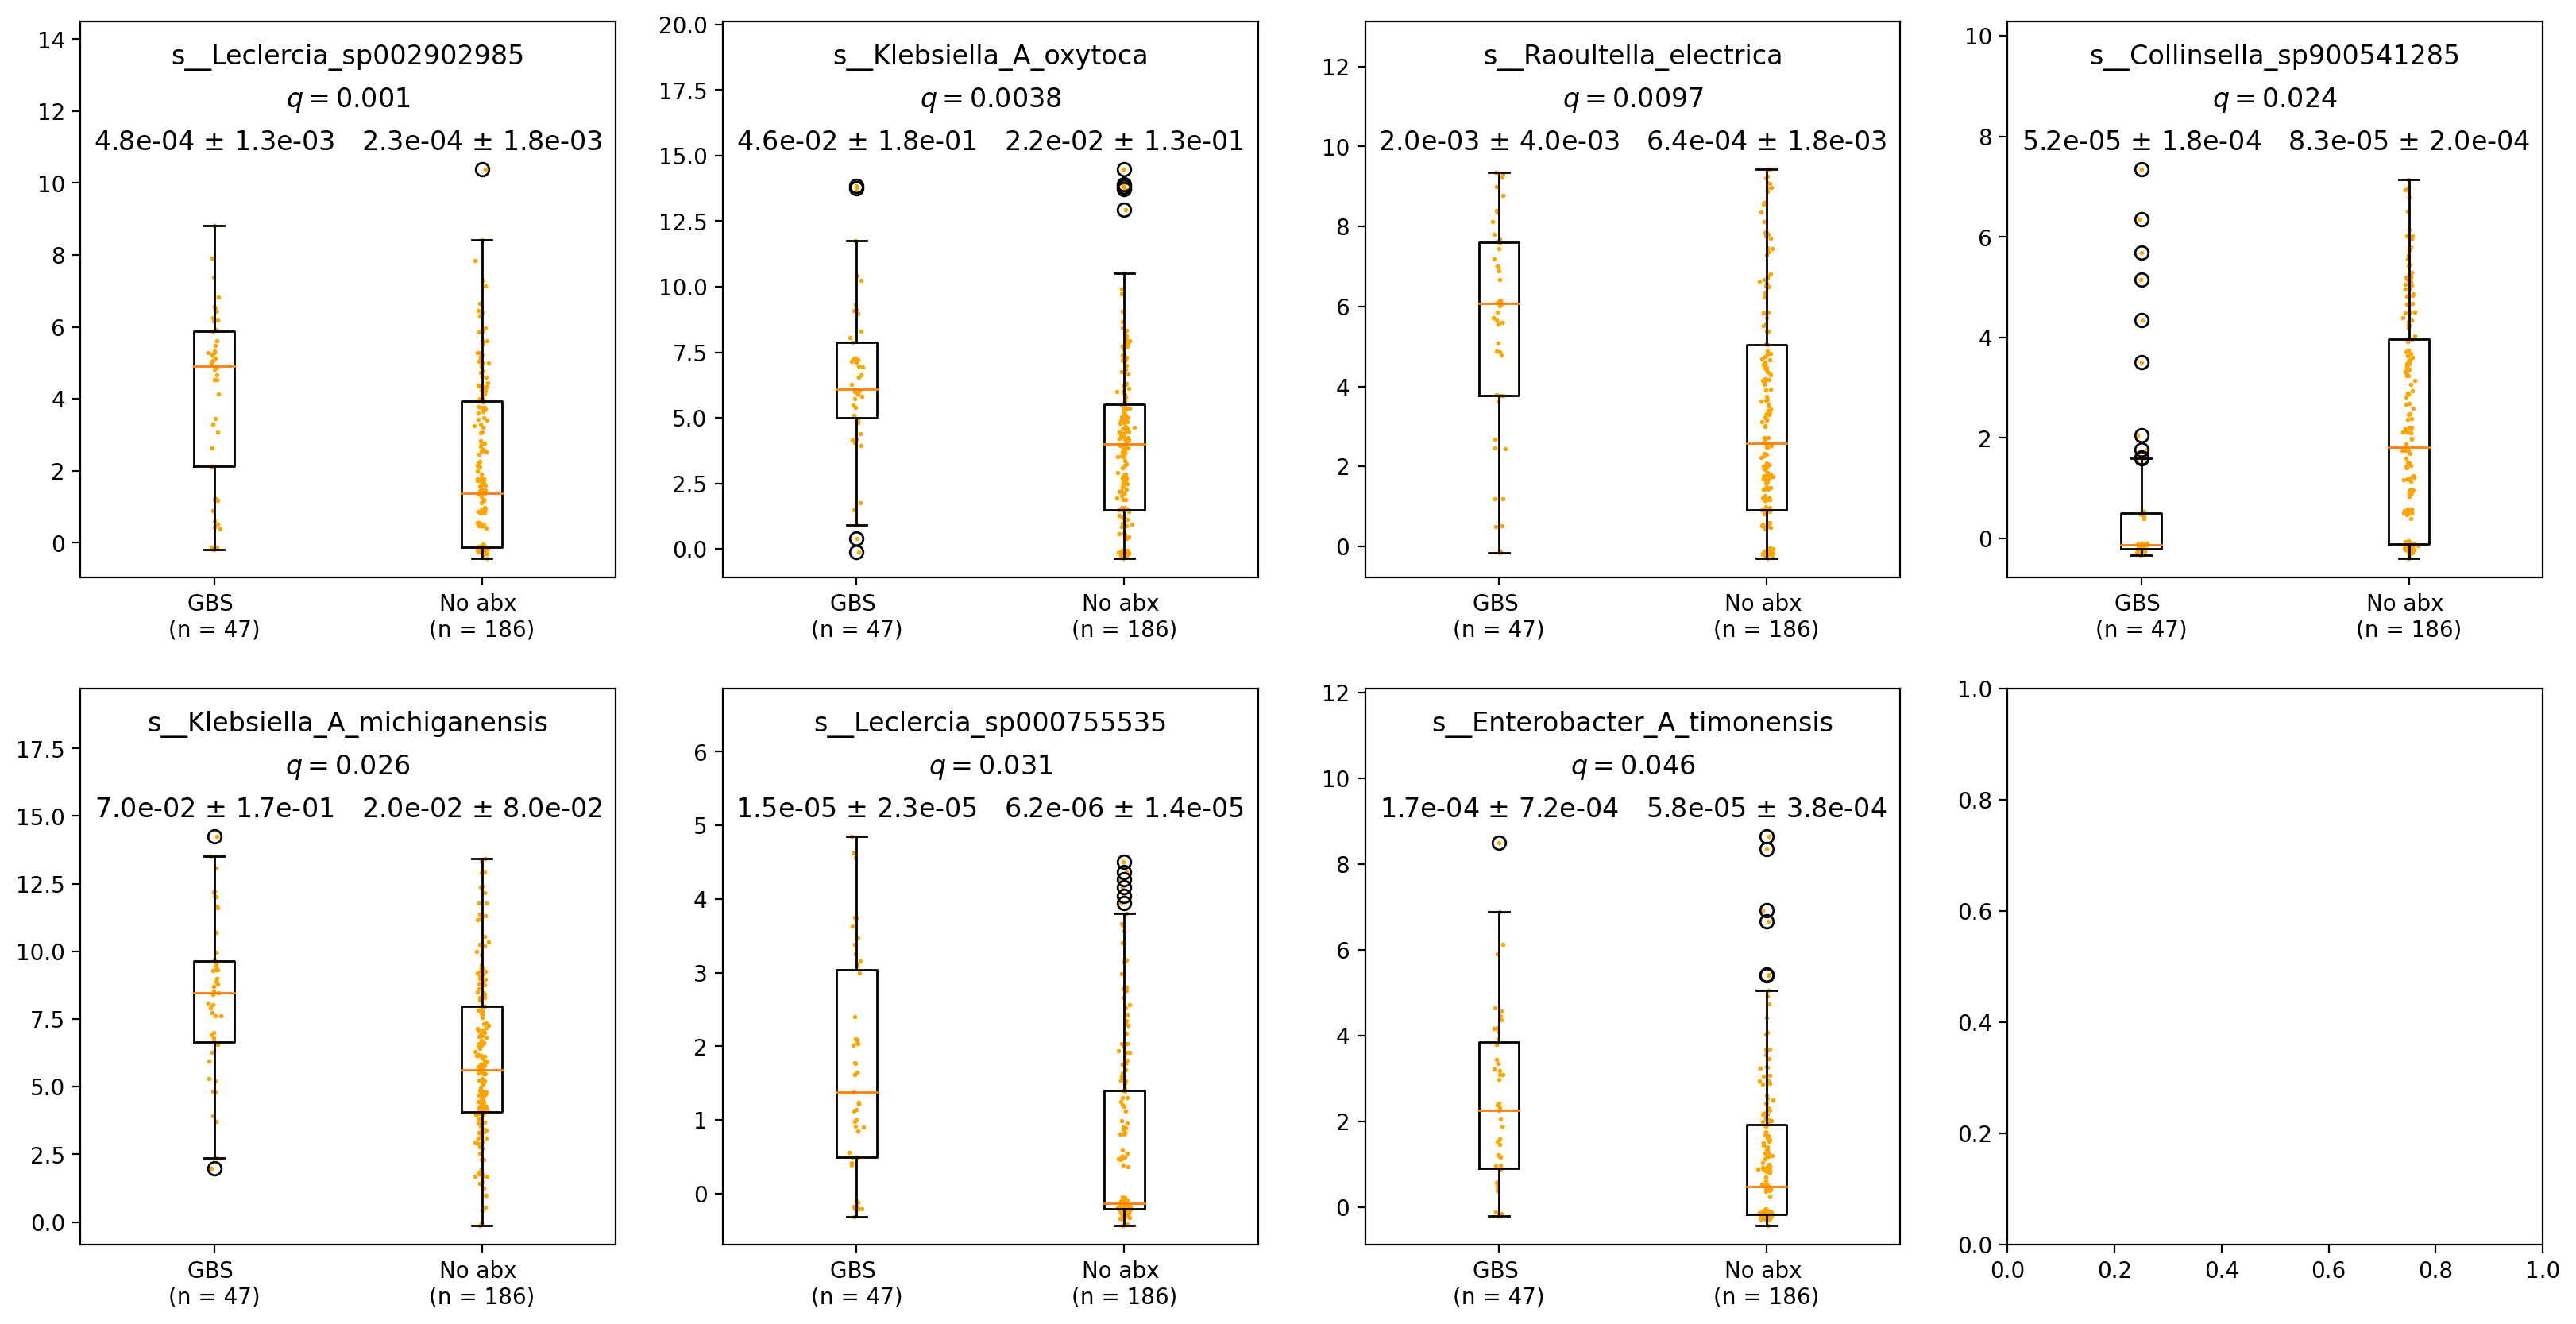

In [14]:
analyze_timepoint(1)

0


11141it [00:07, 1548.98it/s]


,taxa,p,q
645,k__Bacteria;p__Firmicutes_C;c__Negativicutes;o...,0.000007,0.077961
1896,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,0.000013,0.142575
1557,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,0.000045,0.503496
309,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,0.000070,0.782297
1941,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,0.000093,1.032071
...,...,...,...
3203,k__Bacteria;p__Firmicutes_A;c__Clostridia_A;o_...,0.997880,11119.372836
1740,k__Bacteria;p__Actinobacteriota;c__Actinomycet...,0.997880,11119.372836
1290,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...,0.997880,11119.372836
2560,k__Bacteria;p__Cyanobacteria;c__Cyanobacteriia...,0.997880,11119.372836


1


11141it [00:07, 1562.61it/s]


,p,q
taxa,,
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Leclercia;s__Leclercia_sp002902985,9.266563e-08,0.001033
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella_A;s__Klebsiella_A_oxytoca,3.426322e-07,0.003818
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Raoultella;s__Raoultella_electrica,8.693517e-07,0.009687
k__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Coriobacteriaceae;g__Collinsella;s__Collinsella_sp900541285,2.164067e-06,0.024114
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Klebsiella_A;s__Klebsiella_A_michiganensis,2.324660e-06,0.025904
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Leclercia;s__Leclercia_sp000755535,2.810801e-06,0.031321
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Enterobacter_A;s__Enterobacter_A_timonensis,4.139441e-06,0.046126


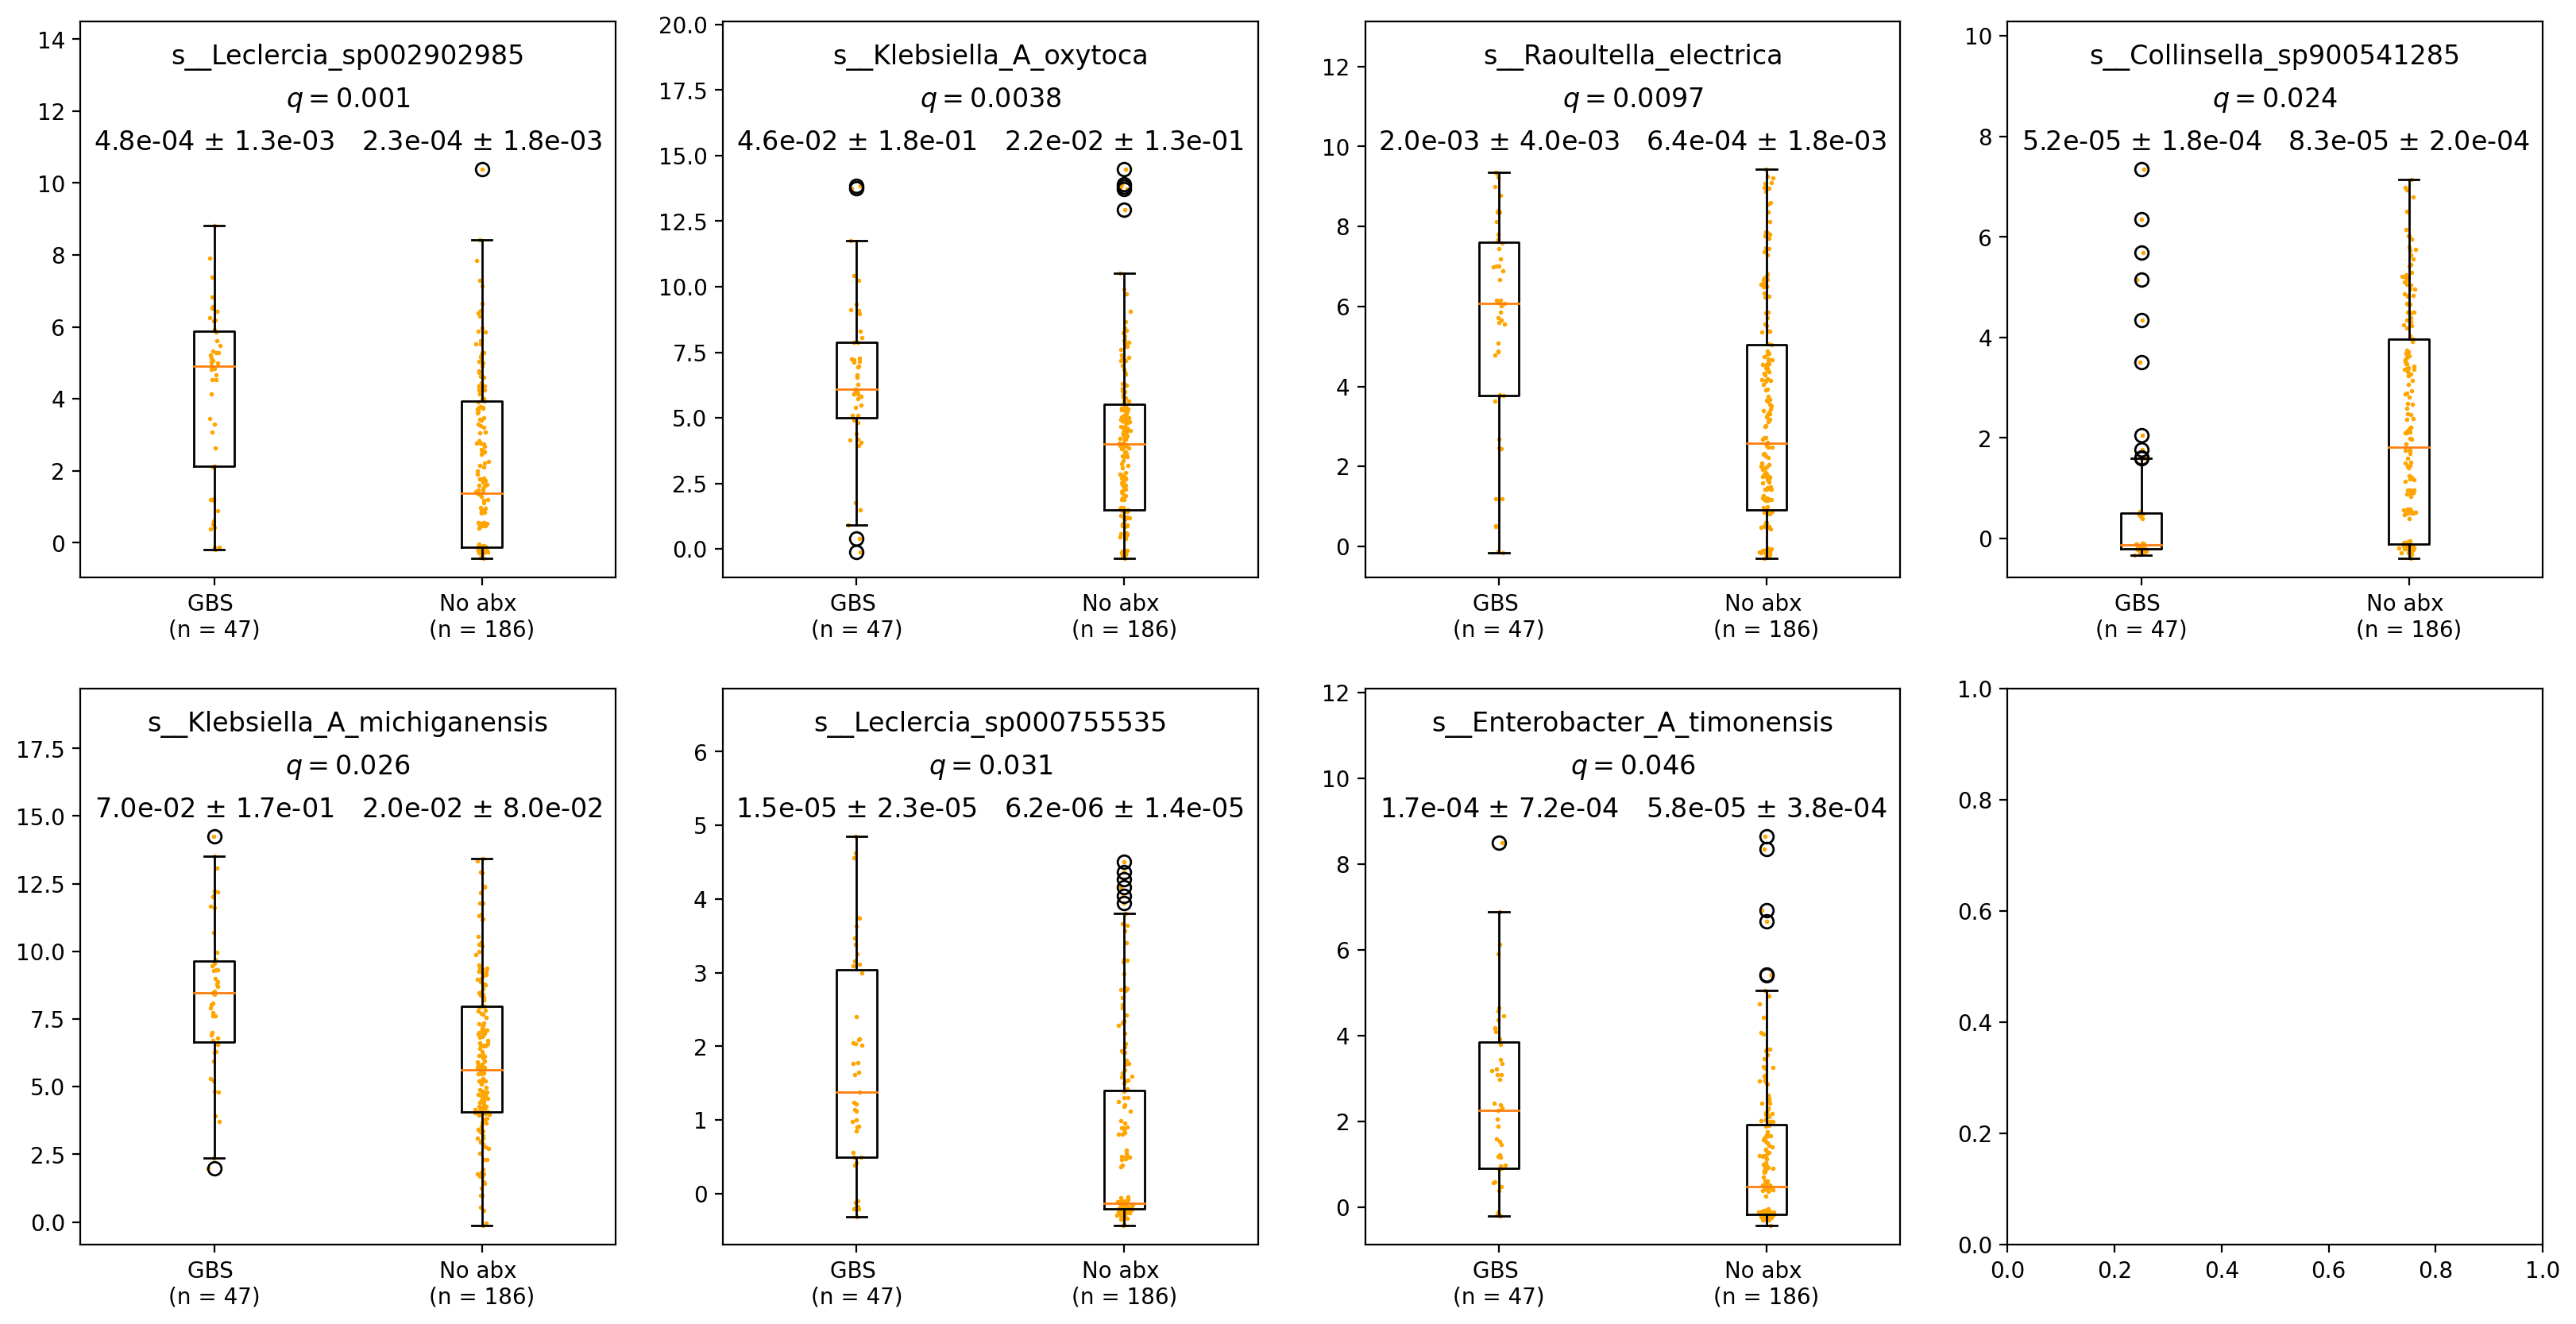

6


11141it [00:07, 1583.30it/s]


,taxa,p,q
520,k__Bacteria;p__Firmicutes_C;c__Negativicutes;o...,0.000046,0.507719
2395,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,0.000068,0.752823
686,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,0.000153,1.708972
723,k__Bacteria;p__Firmicutes_C;c__Negativicutes;o...,0.000288,3.211696
92,k__Bacteria;p__Firmicutes_C;c__Negativicutes;o...,0.000335,3.736151
...,...,...,...
5827,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,0.998881,11130.529942
10494,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,0.998881,11130.529942
6015,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,0.998881,11130.529942
6088,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,0.998881,11130.529942


12


11141it [00:06, 1676.92it/s]


,taxa,p,q
434,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,0.000100,1.109981
628,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,0.000220,2.453854
1160,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...,0.000229,2.552352
719,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,0.000248,2.760581
686,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,0.000309,3.440398
...,...,...,...
5419,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,0.997337,11113.326848
569,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,1.000000,11143.000000
2325,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,1.000000,11143.000000
2575,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,1.000000,11143.000000


18


11141it [00:06, 1715.28it/s]


,taxa,p,q
1191,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...,0.000511,5.696773
4713,k__Bacteria;p__Firmicutes_C;c__Negativicutes;o...,0.000686,7.642675
600,k__Bacteria;p__Firmicutes_C;c__Negativicutes;o...,0.001068,11.895379
195,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,0.004054,45.171341
956,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,0.004543,50.625727
...,...,...,...
1089,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__T...,1.000000,11143.000000
579,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,1.000000,11143.000000
344,k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,1.000000,11143.000000
3321,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__P...,1.000000,11143.000000


24


11141it [00:06, 1656.84it/s]


,taxa,p,q
4153,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...,0.000033,0.367929
1191,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__L...,0.000136,1.515778
1720,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__U...,0.000423,4.712399
4869,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...,0.000589,6.567435
1048,k__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,0.002536,28.261783
...,...,...,...
1360,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...,1.000000,11143.000000
4623,k__Bacteria;p__Firmicutes_A;c__Clostridia;o__O...,1.000000,11143.000000
4593,k__Bacteria;p__Desulfobacterota;c__Desulfovibr...,1.000000,11143.000000
1531,k__Bacteria;p__Firmicutes_A;c__Clostridia_A;o_...,1.000000,11143.000000


In [15]:
for i in [0, 1, 6, 12, 18, 24]:
    print(i)
    analyze_timepoint(i)